<a href="https://colab.research.google.com/github/lucygranger/COGS108_Repo/blob/main/FinalProject_Group101_FA23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 -  Final Project (Predictors of the Oscars Best Picture)

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[X] YES - make available <br>
[ ] NO - keep private


## Names

- Jenny Quach
- Lucy Granger
- Anvita Suresh
- Boston Thome
- Angela (Anqi) Wu

Video Link:
https://youtu.be/cfASXakdgmM


# Research Question

Which variable(s) out of the following - audience rating, genre, release date, and number of nominations in other categories - can be best used to predict whether a movie will win the Best Picture Award at the Oscars out of the nominees?



## Background and Prior Work


The Oscars are annual awards that are meant to recognize movies in various categories for excellence in cinematic achievements and film work. These awards deliver great amounts of recognition and prestige to those who win and are determined by the Academy of Motion Picture Arts and Sciences (AMPAS). The award of Best Picture is the most prestigious and sought out award at this event.

However, the winning movie might not necessarily be the one that we expect. Oftentimes, the movie that has the highest audience rating does not end up being the movie that wins. There have been many cases where a film is critically acclaimed but still bombed at the box office. The Academy Awards have also been criticized by some for not being representative enough or for being biased to one type of movie. Therefore, we wanted to see if there was indeed a relationship between certain movie attributes and its likelihood of winning at the Oscars.

This topic has definitely been explored on the internet before. One analysis done by DataRes at UCLA looked at relationships between factors such as the influence of the director, production house, film budget, box office revenue and genre. This article would be very helpful because it does not answer the question we are trying to answer but gives us some insight on what causes certain movies to have better box office revenue than others. Through our exploration and research, we may find a correlation between revenue and Oscar winners with the help of this article.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)

Another analysis conducted by the Bloomberg company shows what it would look like if Hollywood were to engineer a best actor, best actress, and best picture with the picture being a drama, between 121 and 160 minutes long, released in the final months of the year by Columbia Pictures, that had an average budget of 290 million at the box office. This article relates to our question because it can give us insight into what the authors of the article believe to be important attributes of the best picture awards. We can compare our findings with this article and see if there is a correlation between what they have deemed significant to ‘build an Oscar winner’ and the data we have collected.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)


1. <a name="cite_note-1"></a> [^](#cite_ref-1) DataRes at UCLA. (28 Mar 2022) The Success of Movies at the Oscars, Box Office, and Reviews. Medium. https://ucladatares.medium.com/the-success-of-movies-at-the-oscars-box-office-and-reviews-e33e5059ea40
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Keith Collins and Adam Pearce. (18 Feb 2015) How to Build an Oscar Winner. https://www.bloomberg.com/graphics/2015-oscar-winners/


# Hypothesis


We believe that yes, there are attributes that can be used to predict the Oscar Best Picture Award winner from the nominees: specifically the audience rating, genre, movie studio, time of release, and number of categories nominated for. We believe that the number of categories nominated for will be the most influential attribute to predicting the Oscar Best Picture award winner because if the Academy Award board deems the movie good enough to nominate for other categories, the board probably also favors that movie for the Best Picture award.

# Data

## Data overview

Dataset #1:

- Name: Academy Awards Oscars: Nominees and Winners 1927 to Present
- Link: https://datahub.io/rufuspollock/oscars-nominees-and-winners#resource-oscars-nominees-and-winners_zip
- Number of Observations: 11,058
- Number of Variables: 4

Dataset #2:
- Name: Oscar Best Picture Movies
- Link: https://www.kaggle.com/datasets/martinmraz07/oscar-movies
- Number of Observations: 571
- Number of Variables: 30

Dataset #1 contains a list of all nominees and winners in every single Oscar category since 1927. The important variables here would be the winner/nominee distinction and  the title of the movie. One of the attributes we are interested in looking at are how many nominations each movie has, and because this dataset contains all the nominees for every Oscar category, we could check to see how many nominations each movie has and create another variable for that. After we did that, we could just drop all of the nominations that are not for Best Picture.

Dataset #2 is a list of all the Best Picture winners and nominees. The variables we are interested in here are the movie genres, studio, date of release, and IMDB and Rotten Tomatoes audience ratings. There are a lot of unnecessary variables such as movie length and cast, so we would drop all of those columns.

We would merge the two datasets together by matching the movie titles to get a dataset with all five of the attributes we are interested in.


In [ ]:
%pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Oscar nominees & winners dataset



In [ ]:
oscar_winner = pd.read_csv('https://datahub.io/rufuspollock/oscars-nominees-and-winners/r/0.csv')
oscar_winner

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
...,...,...,...,...
11053,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de..."
11054,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...
11055,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE..."
11056,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...


In [ ]:
oscar_greater_1962 = oscar_winner[oscar_winner['year'] >= 1962]

In [ ]:
num_of_noms = []
oscar_greater_1962 = oscar_greater_1962.reset_index(drop=True)
for i in range(len(oscar_greater_1962)):
    row = oscar_greater_1962.iloc[i]
    year = row["year"]
    entity = row["entity"]
    num = len(oscar_greater_1962[(oscar_greater_1962["year"] == year) & (oscar_greater_1962["entity"] == entity)])
    num_of_noms.append(num)
oscar_greater_1962["number_of_nominations"] = num_of_noms
oscar_greater_1962

,year,category,winner,entity,number_of_nominations
0,1962,ACTOR,False,Burt Lancaster,1
1,1962,ACTOR,False,Jack Lemmon,1
2,1962,ACTOR,False,Marcello Mastroianni,1
3,1962,ACTOR,False,Peter O'Toole,1
4,1962,ACTOR,True,Gregory Peck,1
...,...,...,...,...,...
7031,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de...",1
7032,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...,1
7033,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE...",1
7034,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...,1


In [ ]:
oscar_greater_1962[oscar_greater_1962["number_of_nominations"] > 1]

,year,category,winner,entity,number_of_nominations
20,1962,ART DIRECTION (Black-and-White),False,Days of Wine and Roses,3
21,1962,ART DIRECTION (Black-and-White),False,The Longest Day,5
24,1962,ART DIRECTION (Black-and-White),True,To Kill a Mockingbird,6
25,1962,ART DIRECTION (Color),True,Lawrence of Arabia,8
26,1962,ART DIRECTION (Color),False,Meredith Willson's The Music Man,6
...,...,...,...,...,...
7014,2017,WRITING (Adapted Screenplay),False,Mudbound,3
7016,2017,WRITING (Original Screenplay),True,Get Out,3
7017,2017,WRITING (Original Screenplay),False,Lady Bird,3
7018,2017,WRITING (Original Screenplay),False,The Shape of Water,10


In [ ]:
best_picture = oscar_greater_1962[oscar_greater_1962['category'] == 'BEST PICTURE']
best_picture

,year,category,winner,entity,number_of_nominations
85,1962,BEST PICTURE,True,Lawrence of Arabia,8
86,1962,BEST PICTURE,False,The Longest Day,5
87,1962,BEST PICTURE,False,Meredith Willson's The Music Man,6
88,1962,BEST PICTURE,False,Mutiny on the Bounty,7
89,1962,BEST PICTURE,False,To Kill a Mockingbird,6
...,...,...,...,...,...
6975,2017,BEST PICTURE,False,Lady Bird,3
6976,2017,BEST PICTURE,False,Phantom Thread,4
6977,2017,BEST PICTURE,False,The Post,1
6978,2017,BEST PICTURE,True,The Shape of Water,10


## Movie Details Dataset

In [ ]:
url='https://drive.google.com/file/d/10jk1O4OE44nqZ8iDIt6hf3EKWV7Gr75V/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Streaming Release Date', 'Film ID', 'Year of Release', 'Movie Genre',
        'Production Company', 'Movie Info', 'Audience Status', 'Audience Rating', 'Audience Count', 'Directors',
        'Authors', 'Actors', 'Content Rating', 'Movie Time', 'Tomatometer Status', 'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
        'Tomatometer Rotten Critics Count', 'Film ID', 'Critic Consensus'])
df = df.dropna()

In [ ]:
df.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,IMDB Rating,IMDB Votes,Genres,Original Release Date,Tomatometer Rating,Tomatometer Count
0,Wings,1927/28,Famous Players-Lasky,Winner,7.5,"12,221","Action & Adventure, Classics",1927-08-12,93.0,46.0
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,5.7,"6,890","Musical & Performing Arts, Romance",1929-02-01,33.0,24.0
6,In Old Arizona,1928/29,Fox,Nominee,5.6,"1,019","Action & Adventure, Classics, Western, Romance",1928-12-25,56.0,9.0
9,The Big House,1929/30,Cosmopolitan,Nominee,7.1,"2,079","Classics, Drama",1930-05-14,75.0,8.0
13,Cimarron,1930/31,RKO Radio,Winner,5.9,"5,851","Classics, Drama, Western",1931-01-26,50.0,24.0


# Combining Datasets


Let's merge the two datasets based on the Film Title.

In [ ]:
bestpicture = oscar_greater_1962[oscar_greater_1962['category'] == 'BEST PICTURE']
bestpicture = bestpicture.rename(columns = {'entity':'Film', 'number_of_nominations':'Nominations'})
bestpicture = bestpicture.drop(columns =['category', 'year', 'winner'])
oscardata = pd.merge(bestpicture, df, on="Film")
oscardata

,Film,Nominations,Oscar Year,Film Studio/Producer(s),Award,IMDB Rating,IMDB Votes,Genres,Original Release Date,Tomatometer Rating,Tomatometer Count
0,Lawrence of Arabia,8,1962,Sam Spiegel,Winner,8.3,"278,596","Action & Adventure, Classics, Drama",1962-12-16,98.0,88.0
1,The Longest Day,5,1962,Darryl F. Zanuck,Nominee,7.8,"53,759","Action & Adventure, Classics, Drama",1962-06-01,87.0,23.0
2,Mutiny on the Bounty,7,1935,Metro-Goldwyn-Mayer,Winner,7.7,"21,805","Action & Adventure, Classics, Drama",1935-11-08,93.0,41.0
3,Mutiny on the Bounty,7,1962,Aaron Rosenberg,Winner,7.2,"15,634","Action & Adventure, Classics, Drama",1962-11-08,68.0,19.0
4,America America,4,1963,Elia Kazan,Nominee,7.8,"5,215",Drama,1963-12-15,67.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
265,Dunkirk,8,2017,Emma Thomas and Christopher Nolan,Nominee,7.8,"591,901","Action & Adventure, Drama",2017-07-21,92.0,453.0
266,Get Out,3,2017,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"526,587","Horror, Mystery & Suspense",2017-02-24,98.0,386.0
267,Lady Bird,3,2017,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"258,867","Comedy, Drama",2017-11-03,99.0,391.0
268,The Shape of Water,10,2017,Guillermo del Toro and J. Miles Dale,Winner,7.3,"391,523","Drama, Science Fiction & Fantasy, Romance",2017-12-22,92.0,448.0


In [ ]:
oscardata = oscardata.drop(columns=['Oscar Year', 'IMDB Votes', 'Tomatometer Rating', 'Tomatometer Count'])

Now that we have a merged dataset, we want to cleanup a couple of our columns still.

We want to look at the specific month a movie was released in. Therefore, let's write a function that will turn the Original Release Date into a month.

In [ ]:
def object_to_month(string):
    num = string[5] + string[6]
    if num == '01':
        month = 'January'
    elif num == '02':
        month = 'February'
    elif num == '03':
        month = 'March'
    elif num == '04':
        month = 'April'
    elif num == '05':
        month = 'May'
    elif num == '06':
        month = 'June'
    elif num == '07':
        month = 'July'
    elif num == '08':
        month = 'August'
    elif num == '09':
        month = 'September'
    elif num == '10':
        month = 'October'
    elif num == '11':
        month = 'November'
    elif num == '12':
        month = 'December'
    else:
        month = np.nan
    return month

In [ ]:
oscardata['Month of Release'] = oscardata['Original Release Date'].apply(object_to_month)

Let's clean up the genres as well to make for easier analysis later. Here we write a function that makes it so that every movie is categorized as the genre that is most specific to it.

In [ ]:
def cleanup_genres(string):
    output = []
    if "Classics" in string:
        output.append("Classics")
    if "Science Fiction & Fantasy" in string:
        output.append("SciFi & Fantasy")
    if "Kids & Family" in string:
        output.append("Kids & Family")
    if "Horror" in string:
        output.append("Horror")
    if "Sports & Fitness" in string:
        output.append("Sports")
    if "Musical & Performing Arts" in string:
        output.append("Musical & Arts")
    if "Western" in string:
        output.append("Western")
    if "Action & Adventure" in string:
        output.append("Action")
    if "Comedy" in string and "Romance" in string:
        output.append("RomCom")
    if "Comedy" in string:
        output.append("Comedy")
    if "Romance" in string:
        output.append("Romance")
    if "Mystery & Suspense" in string:
        output.append("Mystery & Suspense")
    if "Drama" in string:
        output.append("Drama")
    return ", ".join(output) if output else np.nan

In [ ]:
oscardata['Genres'] = oscardata['Genres'].apply(cleanup_genres)
oscardata

,Film,Nominations,Film Studio/Producer(s),Award,IMDB Rating,Genres,Original Release Date,Month of Release
0,Lawrence of Arabia,8,Sam Spiegel,Winner,8.3,"Classics, Action, Drama",1962-12-16,December
1,The Longest Day,5,Darryl F. Zanuck,Nominee,7.8,"Classics, Action, Drama",1962-06-01,June
2,Mutiny on the Bounty,7,Metro-Goldwyn-Mayer,Winner,7.7,"Classics, Action, Drama",1935-11-08,November
3,Mutiny on the Bounty,7,Aaron Rosenberg,Winner,7.2,"Classics, Action, Drama",1962-11-08,November
4,America America,4,Elia Kazan,Nominee,7.8,Drama,1963-12-15,December
...,...,...,...,...,...,...,...,...
265,Dunkirk,8,Emma Thomas and Christopher Nolan,Nominee,7.8,"Action, Drama",2017-07-21,July
266,Get Out,3,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"Horror, Mystery & Suspense",2017-02-24,February
267,Lady Bird,3,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"Comedy, Drama",2017-11-03,November
268,The Shape of Water,10,Guillermo del Toro and J. Miles Dale,Winner,7.3,"SciFi & Fantasy, Romance, Drama",2017-12-22,December


We want to check if there are any duplicates after we merge.

In [ ]:
oscardata['Film'].value_counts().sort_values(ascending=False)

Romeo and Juliet                             2
Heaven Can Wait                              2
Mutiny on the Bounty                         2
Platoon                                      1
M*A*S*H                                      1
                                            ..
Moonlight                                    1
Darkest Hour                                 1
Dunkirk                                      1
Get Out                                      1
Three Billboards Outside Ebbing, Missouri    1
Name: Film, Length: 267, dtype: int64

In [ ]:
duplicates = ['Romeo and Juliet', 'Heaven Can Wait', 'Mutiny on the Bounty']
for d in duplicates:
  print(oscardata[oscardata['Film'] == d])

                Film  Nominations                    Film Studio/Producer(s)  \
28  Romeo and Juliet            4                        Metro-Goldwyn-Mayer   
29  Romeo and Juliet            4  Anthony Havelock-Allan and John Brabourne   

      Award  IMDB Rating                    Genres Original Release Date  \
28  Nominee          6.5  Classics, Romance, Drama            1936-09-03   
29  Nominee          7.6            Romance, Drama            1968-10-08   

   Month of Release  
28        September  
29          October  
               Film  Nominations Film Studio/Producer(s)    Award  \
68  Heaven Can Wait            6        20th Century-Fox  Nominee   
69  Heaven Can Wait            6           Warren Beatty  Nominee   

    IMDB Rating                                             Genres  \
68          7.4  Classics, SciFi & Fantasy, RomCom, Comedy, Rom...   
69          6.9   SciFi & Fantasy, Sports, RomCom, Comedy, Romance   

   Original Release Date Month of Release  
6

We observe that the duplicate is actually the same movies name in different year with different studio and producer, not due to our merge. Hence, we will keep the data as it as and will not drop anything.

Now, we will be checking for null values in the data.

In [ ]:
oscardata.isna().any(axis=1).value_counts()

False    270
dtype: int64

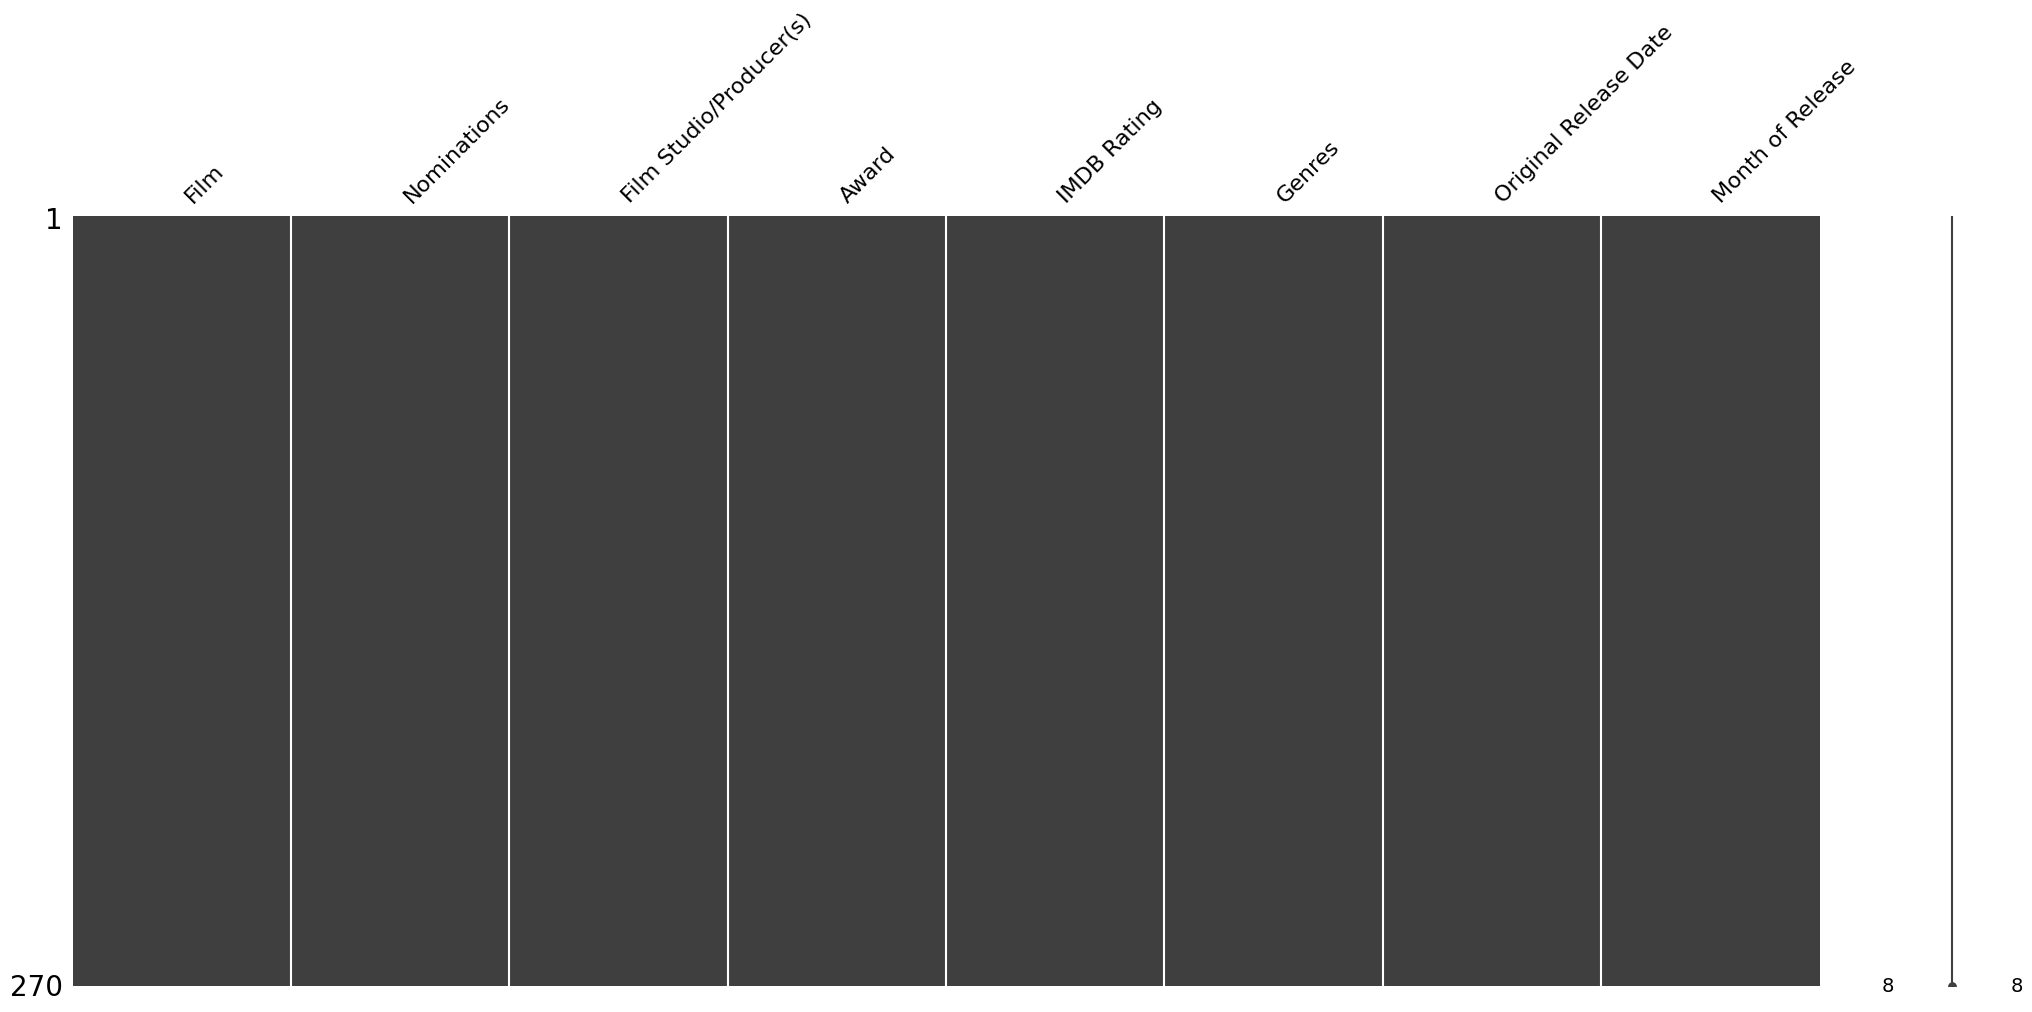

In [ ]:
msno.matrix(oscardata);

As observed, it looks like all the data is good now. After all the cleaning, there seem to be no missing values in our dataset at all.

## Exploratory Data Analysis


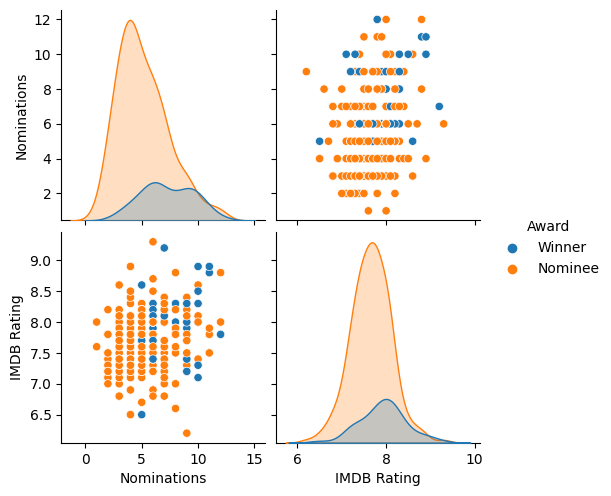

In [ ]:
sns.pairplot(oscardata, hue='Award')

Let's look at the basic statistics in nominations and IMDB rating for both the winner and nominee datasets and plot them using some simple visualizations.

In [ ]:
oscardata.groupby(['Award']).describe()

Nominations                                               IMDB Rating  \
              count      mean       std  min  25%  50%  75%   max       count   
Award                                                                           
Nominee       219.0  5.127854  2.271099  1.0  3.0  5.0  6.0  12.0       219.0   
Winner         51.0  7.274510  2.254581  3.0  6.0  7.0  9.0  12.0        51.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Award                                                 
Nominee  7.657534  0.457732  6.2  7.4  7.7  8.0  9.3  
Winner   7.927451  0.514229  6.5  7.7  8.0  8.2  9.2

Interestingly enough there looks like there might be a difference in nominations but not so much in IMDB rating.

<Axes: xlabel='Award', ylabel='Nominations'>

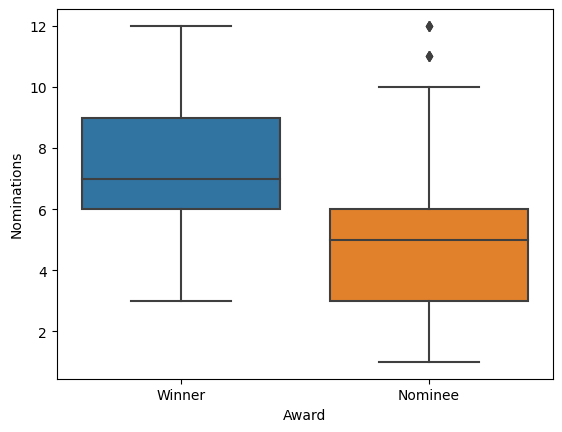

In [ ]:
sns.boxplot(data=oscardata,x='Award',y='Nominations')

Right from the start, we can see that this box plots indicates that Oscar Best Picture winners recieved more overall nominations than Oscar nominees who did not win.

<Axes: xlabel='Award', ylabel='IMDB Rating'>

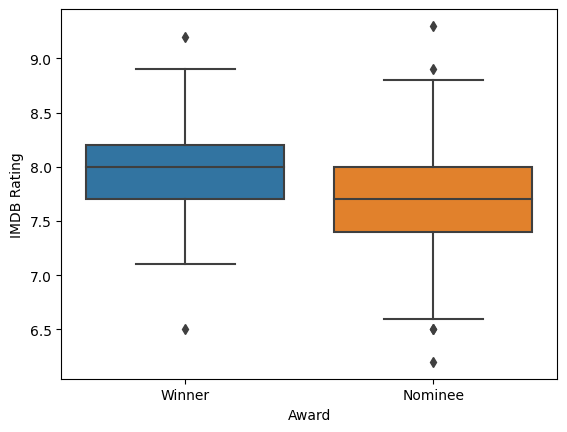

In [ ]:
sns.boxplot(data=oscardata,x='Award',y='IMDB Rating')

This next box plot shows us that Oscar Best Picture winners had a tendancy to have higher IMDB ratings than films who were nominated but did not win the award.

Let's split up our data into two datasets: winners and nominees so we can compare the differences between both.

## Section 1 of EDA - Winners vs. Nominees

In [ ]:
winners = oscardata[oscardata['Award'] == 'Winner']
nominees = oscardata[oscardata['Award'] == 'Nominee']




### Month of Release of Movie

Now let's take a look at the differences in the month of release between the winners and nominees.

In [ ]:
winners_mon = winners['Month of Release'].value_counts()
prop_win = pd.DataFrame([['Jan', winners_mon['January']/winners_mon.sum()],
                        ['Feb', winners_mon['February']/winners_mon.sum()],
                        ['Mar', winners_mon['March']/winners_mon.sum()],
                        ['Apr', winners_mon['April']/winners_mon.sum()],
                        ['May', winners_mon['May']/winners_mon.sum()],
                        ['Jun', 0/winners_mon.sum()],
                        ['Jul', winners_mon['July']/winners_mon.sum()],
                        ['Aug', winners_mon['August']/winners_mon.sum()],
                        ['Sept', winners_mon['September']/winners_mon.sum()],
                        ['Oct', winners_mon['October']/winners_mon.sum()],
                        ['Nov', winners_mon['November']/winners_mon.sum()],
                        ['Dec', winners_mon['December']/winners_mon.sum()]],
                        columns=['Month', "Proportion"])

nominees_mon = nominees['Month of Release'].value_counts()
prop_nom = pd.DataFrame([['Jan', nominees_mon['January']/nominees_mon.sum()],
                        ['Feb', nominees_mon['February']/nominees_mon.sum()],
                        ['Mar', nominees_mon['March']/nominees_mon.sum()],
                        ['Apr', nominees_mon['April']/nominees_mon.sum()],
                        ['May', nominees_mon['May']/nominees_mon.sum()],
                        ['Jun', nominees_mon['June']/nominees_mon.sum()],
                        ['Jul', nominees_mon['July']/nominees_mon.sum()],
                        ['Aug', nominees_mon['August']/nominees_mon.sum()],
                        ['Sept', nominees_mon['September']/nominees_mon.sum()],
                        ['Oct', nominees_mon['October']/nominees_mon.sum()],
                        ['Nov', nominees_mon['November']/nominees_mon.sum()],
                        ['Dec', nominees_mon['December']/nominees_mon.sum()]],
                        columns=['Month', "Proportion"])

[Text(0.5, 1.0, 'Month of Release of Oscar Best Picture Movie Nominees')]

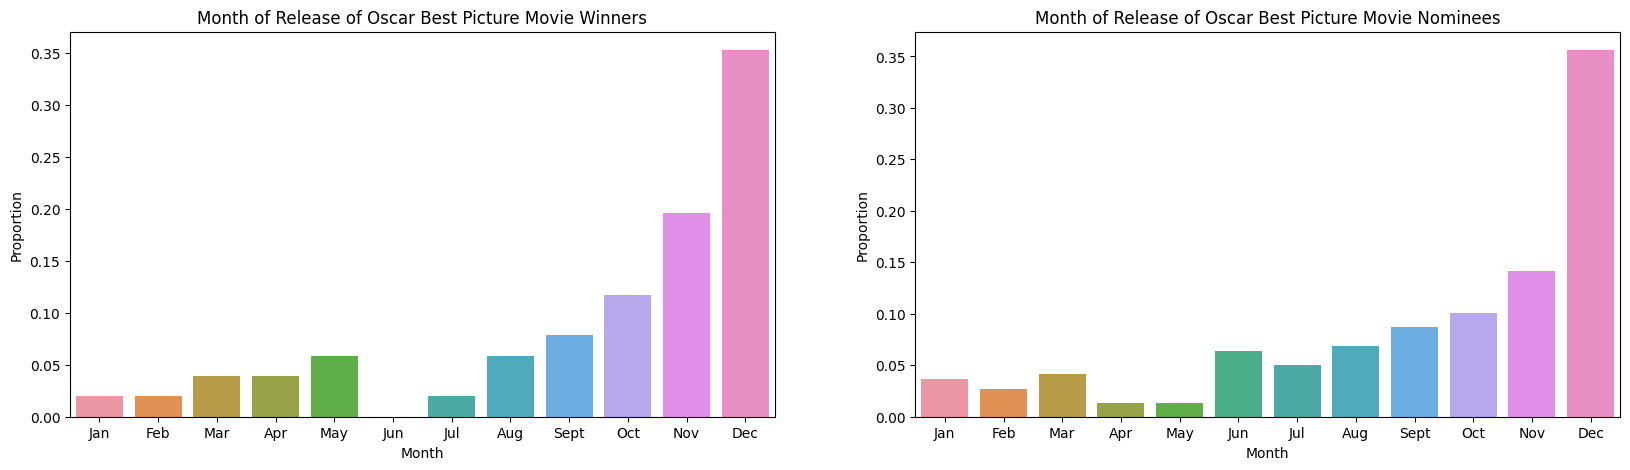

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
win_mon = sns.barplot(data = prop_win, x = 'Month', y = 'Proportion', order=month_order, ax=axs[0])
nom_mon = sns.barplot(data = prop_nom, x = 'Month', y = 'Proportion', order=month_order)

win_mon.set(title = 'Month of Release of Oscar Best Picture Movie Winners')
nom_mon.set(title = 'Month of Release of Oscar Best Picture Movie Nominees')

The plot on the left is for Oscar winners, and the plot on the right is for Oscar nominees. Looks like the general trend is the same for both, with more Oscar movies being released in the latter half of the year. The main difference in these two seems to be the month of June. Our data has zero Oscar winners in June, while there are a fair amount of nominees in June. Overall, when looking at this chart, we can conclude that the proportion of months are about the same, so there is no visable correlation between month that the movie was released and winning the Best Picture Oscar.

In [ ]:
winners['Month of Release'].value_counts()

December     18
November     10
October       6
September     4
August        3
May           3
March         2
April         2
January       1
February      1
July          1
Name: Month of Release, dtype: int64

In [ ]:
nominees["Month of Release"].value_counts()

December     78
November     31
October      22
September    19
August       15
June         14
July         11
March         9
January       8
February      6
April         3
May           3
Name: Month of Release, dtype: int64

From this, we can see that no films released in June won the Oscars at all. In addition to this, the overwhelming majority of winning movies were released in November and December. Although there are more releases in the latter months, it doesn't seem to make a difference in the proportion of a movie winning or just being a nominee.

### Number of Nominations in other categories

Now let's take a closer look at the number of nominations between the two.

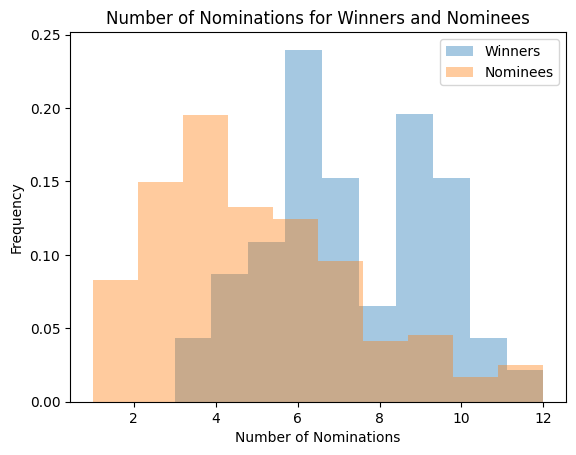

In [ ]:
winners_nom = winners['Nominations']
nominees_nom = nominees['Nominations']

plt.hist(winners_nom, alpha = 0.4, label = "Winners", density = True)
plt.hist(nominees_nom, alpha = 0.4, label = "Nominees", density = True)
plt.title("Number of Nominations for Winners and Nominees")
plt.xlabel("Number of Nominations")
plt.ylabel("Frequency")
plt.legend()

As you can see, the general distribution of number of nominations is higher for the winners than the nominees. A larger frequency of movies had more than 6 nominations in the winners dataset than the nominees dataset.

### IMDB Rating of Movie

What about the IMDB Rating?


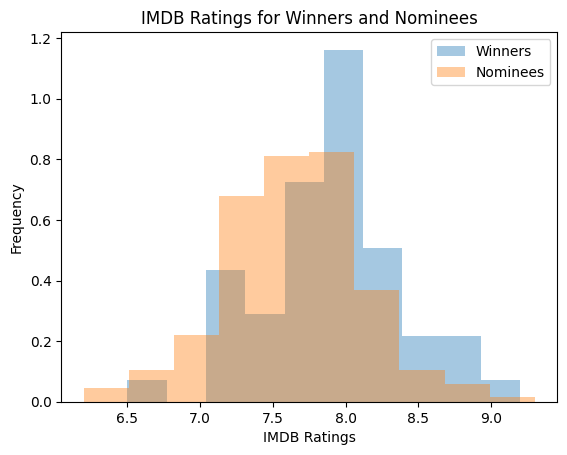

In [ ]:
winners_imdb = winners['IMDB Rating']
nominees_imdb = nominees['IMDB Rating']

plt.hist(winners_imdb, alpha = 0.4, label = "Winners", density = True)
plt.hist(nominees_imdb, alpha = 0.4, label = "Nominees", density = True)
plt.title("IMDB Ratings for Winners and Nominees")
plt.xlabel("IMDB Ratings")
plt.ylabel("Frequency")
plt.legend()

IMDB Rating distribution looks a lot more similar for both datasets than the number of nominations.

We wanted to see if there was a difference in IMDB Ratings for winners in first half of the dataset vs the second half.

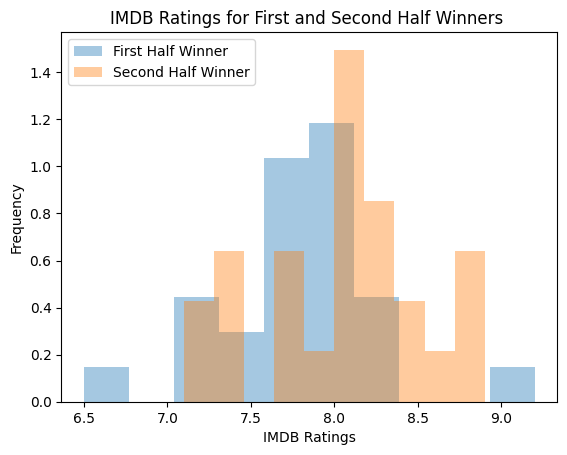

In [ ]:
first_half_winner = winners_imdb.iloc[:len(winners_imdb)//2]
second_half_winner = winners_imdb.iloc[len(winners_imdb)//2:]

plt.hist(first_half_winner, alpha = 0.4, label = "First Half Winner", density = True)
plt.hist(second_half_winner, alpha = 0.4, label = "Second Half Winner", density = True)
plt.title("IMDB Ratings for First and Second Half Winners ")
plt.xlabel("IMDB Ratings")
plt.ylabel("Frequency")
plt.legend()

From the graph we can see that it seems like there are on average higher IMDB ratings in the second half of the dataset

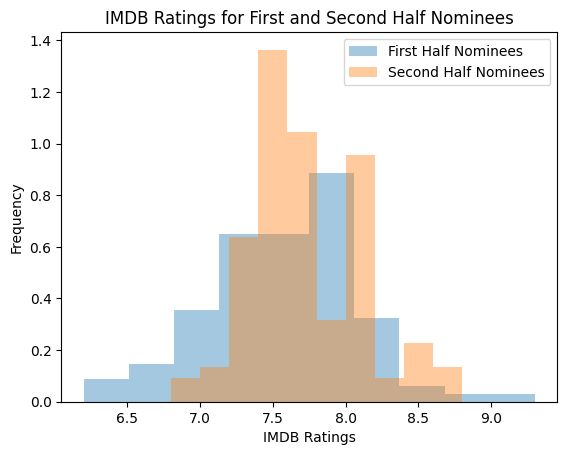

In [ ]:
first_half_nominees = nominees_imdb.iloc[:len(nominees_imdb)//2]
second_half_nominees = nominees_imdb.iloc[len(nominees_imdb)//2:]

plt.hist(first_half_nominees, alpha = 0.4, label = "First Half Nominees", density = True)
plt.hist(second_half_nominees, alpha = 0.4, label = "Second Half Nominees", density = True)
plt.title("IMDB Ratings for First and Second Half Nominees")
plt.xlabel("IMDB Ratings")
plt.ylabel("Frequency")
plt.legend()

### Genre of Movie

What about the genres? Is there a specific genre that tends to win more?

In [ ]:
w_drama = 0
w_action = 0
w_rom = 0
w_mystery = 0
w_kids = 0
w_comedy = 0
w_sports = 0
w_musical = 0
w_scifi = 0
w_horror = 0
w_western = 0

for movie in winners['Genres']:
  if 'Drama' in movie:
    w_drama += 1
  if 'Action' in movie:
    w_action += 1
  if 'Romance' in movie:
    w_rom += 1
  if 'Mystery' in movie:
    w_mystery += 1
  if 'Kids' in movie:
    w_kids += 1
  if 'Comedy' in movie:
    w_comedy += 1
  if 'Sports' in movie:
    w_sports += 1
  if 'Musical' in movie:
    w_musical += 1
  if 'Science' in movie:
    w_scifi += 1
  if 'Horror' in movie:
    w_horror += 1
  if 'Western' in movie:
    w_western += 1

w_sum = w_drama + w_action + w_rom + w_mystery + w_kids + w_comedy + w_sports + w_musical + w_scifi + w_horror + w_western

In [ ]:
n_drama = 0
n_action = 0
n_rom = 0
n_mystery = 0
n_kids = 0
n_comedy = 0
n_sports = 0
n_musical = 0
n_scifi = 0
n_horror = 0
n_western = 0

for movie in nominees['Genres']:
  if 'Drama' in movie:
    n_drama += 1
  if 'Action' in movie:
    n_action += 1
  if 'Romance' in movie:
    n_rom += 1
  if 'Mystery & Suspense' in movie:
    n_mystery += 1
  if 'Kids & Family' in movie:
    n_kids += 1
  if 'Comedy' in movie:
    n_comedy += 1
  if 'Sports' in movie:
    n_sports += 1
  if 'Musical' in movie:
    n_musical += 1
  if 'Science' in movie:
    n_scifi += 1
  if 'Horror' in movie:
    n_horror += 1
  if 'Western' in movie:
    n_western += 1

n_sum = n_drama + n_action + n_rom + n_mystery + n_kids + n_comedy + n_sports + n_musical + n_scifi + n_horror + n_western

In [ ]:
prop_win_gen = pd.DataFrame([['Drama', w_drama/w_sum],
                        ['Action & Adventure', w_action/w_sum],
                        ['Romance', w_rom/w_sum],
                        ['Mystery & Suspense', w_mystery/w_sum],
                        ['Kids & Family', w_kids/w_sum],
                        ['Comedy', w_comedy/w_sum],
                        ['Sports & Fitness', w_sports/w_sum],
                        ['Musical & Performing Arts', w_musical/w_sum],
                        ['Science Fiction & Fantasy', w_scifi/w_sum],
                        ['Horror', w_horror/w_sum],
                        ['Western', w_western/w_sum]],
                        columns=['Genre', "Proportion"])

nominees_gen = nominees['Genres'].value_counts()
prop_nom_gen = pd.DataFrame([['Drama', n_drama/n_sum],
                        ['Action & Adventure', n_action/n_sum],
                        ['Romance', n_rom/n_sum],
                        ['Mystery & Suspense', n_mystery/n_sum],
                        ['Kids & Family', n_kids/n_sum],
                        ['Comedy', n_comedy/n_sum],
                        ['Sports & Fitness', n_sports/n_sum],
                        ['Musical & Performing Arts', n_musical/n_sum],
                        ['Science Fiction & Fantasy', n_scifi/n_sum],
                        ['Horror', n_horror/n_sum],
                        ['Western', n_western/n_sum]],
                        columns=['Genre', "Proportion"])

[Text(0.5, 1.0, 'Genres of Oscar Best Picture Movie Nominees')]

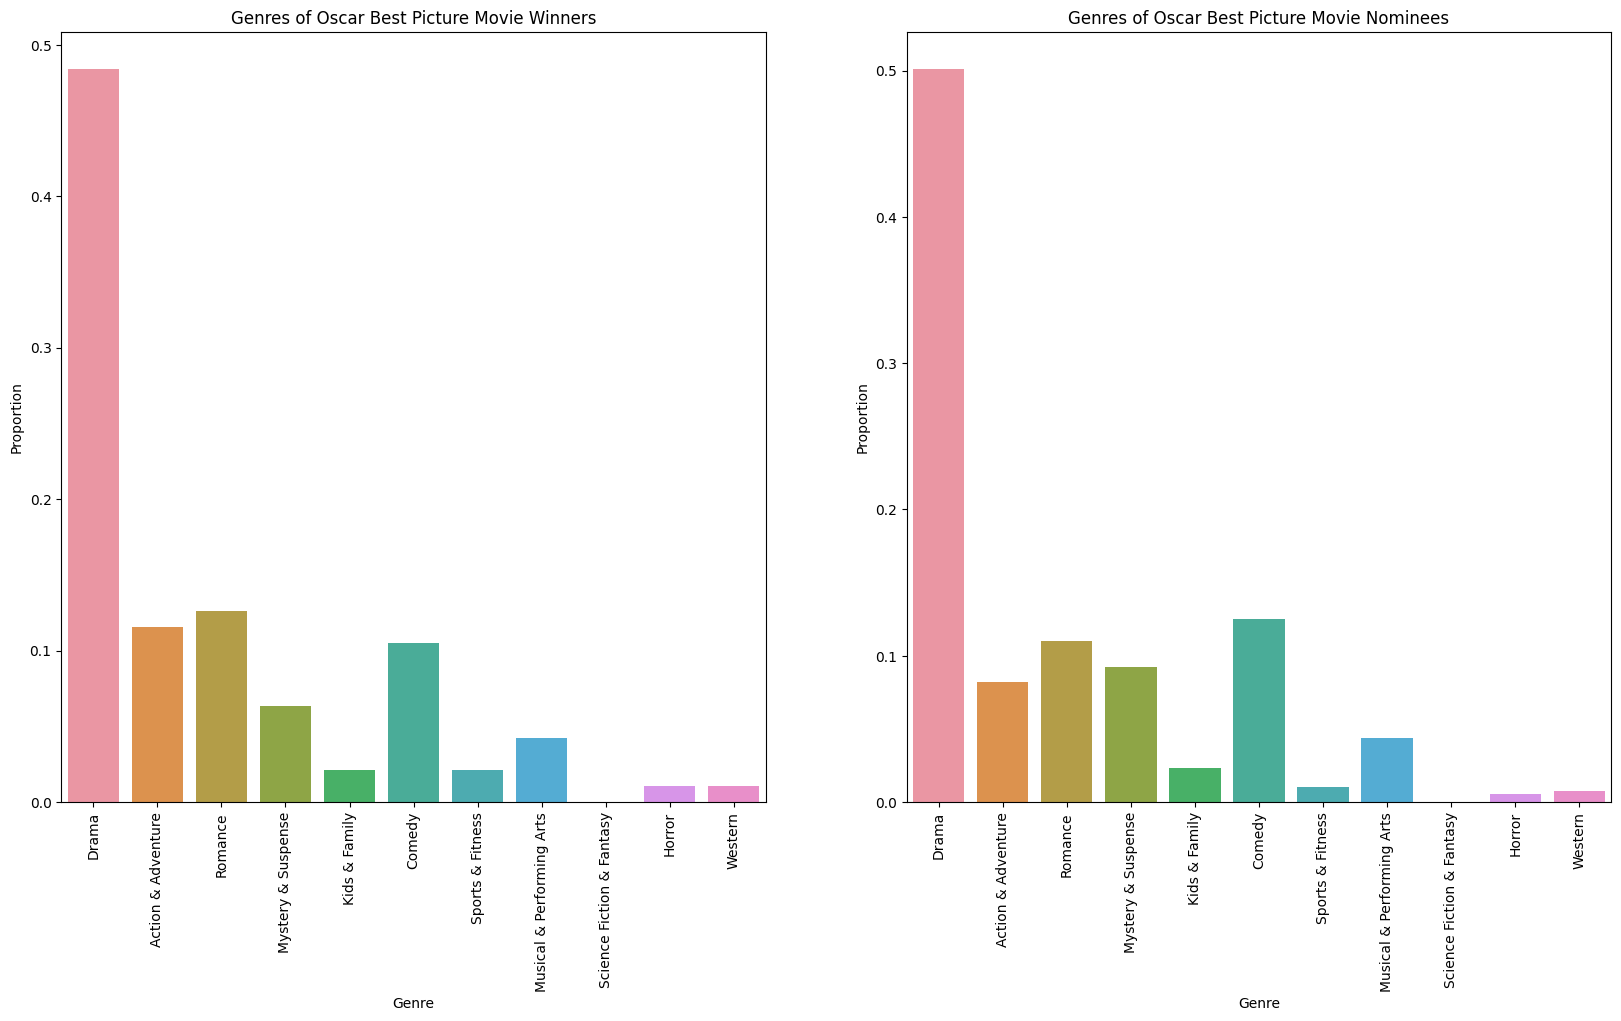

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

win_gen = sns.barplot(data = prop_win_gen, x = 'Genre', y = 'Proportion', ax=axs[0])
nom_gen = sns.barplot(data = prop_nom_gen, x = 'Genre', y = 'Proportion')

x = ['Drama','Action & Adventure', 'Romance', 'Mystery & Suspense', 'Kids & Family', 'Comedy', 'Sports & Fitness',
     'Musical & Performing Arts', 'Science Fiction & Fantasy', 'Horror', 'Western']
win_gen.set_xticklabels(x,rotation=90)
win_gen.set(title = 'Genres of Oscar Best Picture Movie Winners')
nom_gen.set_xticklabels(x,rotation=90)
nom_gen.set(title = 'Genres of Oscar Best Picture Movie Nominees')

Looks like drama is the overwhelming majority genre for both winners and nominees. Overall, the proportions for the genres look pretty similar for both winners and nominees. Though, the second highest genre for winners is Romance, while the second highest for nominees is Comedy.

We next want to compare the different types of genres and the number of nominations that each genre has.

In [ ]:
group_genres_nominations = oscardata[['Genres', 'Nominations']].groupby('Genres').describe()
group_genres_nominations

Nominations             \
                                                         count       mean   
Genres                                                                      
Action                                                     1.0   9.000000   
Action, Drama                                             12.0   7.833333   
Action, Mystery & Suspense, Drama                          6.0   6.000000   
Classics, Action, Drama                                    9.0   7.000000   
Classics, Action, RomCom, Comedy, Romance                  1.0   5.000000   
Classics, Action, Romance, Drama                           1.0   6.000000   
Classics, Comedy                                           1.0   4.000000   
Classics, Comedy, Drama                                    2.0   6.000000   
Classics, Drama                                           17.0   6.529412   
Classics, Horror                                           1.0   7.000000   
Classics, Kids & Family, Musical & Arts, Comedy...         2.0   7.500000   
Classics, Kids & Family, Musical & Arts, Drama             1.0   8.000000   
Classics, Musical & Arts, Comedy                           1.0   7.000000   
Classics, Musical & Arts, Comedy, Drama                    1.0   6.000000   
Classics, Musical & Arts, Drama                            4.0   5.000000   
Classics, Mystery & Suspense, Drama                        3.0   7.000000   
Classics, RomCom, Comedy, Romance, Drama                   4.0   4.250000   
Classics, Romance, Drama                                   4.0   5.000000   
Classics, SciFi & Fantasy, Action                          1.0  11.000000   
Classics, SciFi & Fantasy, Action, Drama                   2.0   9.000000   
Classics, SciFi & Fantasy, Kids & Family, Music...         1.0   9.000000   
Classics, SciFi & Fantasy, Kids & Family, Music...         1.0  12.000000   
Classics, SciFi & Fantasy, Mystery & Suspense, ...         1.0   4.000000   
Classics, SciFi & Fantasy, RomCom, Comedy, Roma...         1.0   6.000000   
Classics, Western, Action                                  1.0   7.000000   
Comedy                                                     2.0   3.000000   
Comedy, Drama                                             13.0   4.076923   
Comedy, Mystery & Suspense, Drama                          1.0   5.000000   
Drama                                                     80.0   4.787500   
Horror, Mystery & Suspense                                 2.0   4.000000   
Kids & Family, Action, Comedy                              1.0   5.000000   
Kids & Family, Comedy                                      1.0   5.000000   
Kids & Family, Mystery & Suspense                          1.0  11.000000   
Musical & Arts, Comedy                                     1.0   4.000000   
Musical & Arts, Comedy, Drama                              3.0   7.666667   
Musical & Arts, Drama                                      3.0   6.666667   
Musical & Arts, Romance, Drama                             2.0   4.000000   
Mystery & Suspense                                         1.0   4.000000   
Mystery & Suspense, Drama                                 20.0   4.450000   
RomCom, Comedy, Romance                                    6.0   4.333333   
RomCom, Comedy, Romance, Drama                            12.0   4.916667   
Romance, Drama                                            16.0   6.187500   
Romance, Mystery & Suspense, Drama                         2.0   5.500000   
SciFi & Fantasy                                            1.0   6.000000   
SciFi & Fantasy, Action                                    1.0  10.000000   
SciFi & Fantasy, Action, Comedy, Mystery & Susp...         1.0   9.000000   
SciFi & Fantasy, Action, Drama                             2.0   3.500000   
SciFi & Fantasy, Action, Mystery & Suspense, Drama         1.0   8.000000   
SciFi & Fantasy, Drama                                     1.0   9.000000   
SciFi & Fantasy, Kids & Family, Action, Drama  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Action, Drama'),
  Text(2, 0, 'Action, Mystery & Suspense, Drama'),
  Text(3, 0, 'Classics, Action, Drama'),
  Text(4, 0, 'Classics, Action, RomCom, Comedy, Romance'),
  Text(5, 0, 'Classics, Action, Romance, Drama'),
  Text(6, 0, 'Classics, Comedy'),
  Text(7, 0, 'Classics, Comedy, Drama'),
  Text(8, 0, 'Classics, Drama'),
  Text(9, 0, 'Classics, Horror'),
  Text(10, 0, 'Classics, Kids & Family, Musical & Arts, Comedy, Drama'),
  Text(11, 0, 'Classics, Kids & Family, Musical & Arts, Drama'),
  Text(12, 0, 'Classics, Musical & Arts, Comedy'),
  Text(13, 0, 'Classics, Musical & Arts, Comedy, Drama'),
  Text(14, 0, 'Classics, Musical & Arts, Drama'),
  Text(15, 0, 'Classics, Myster

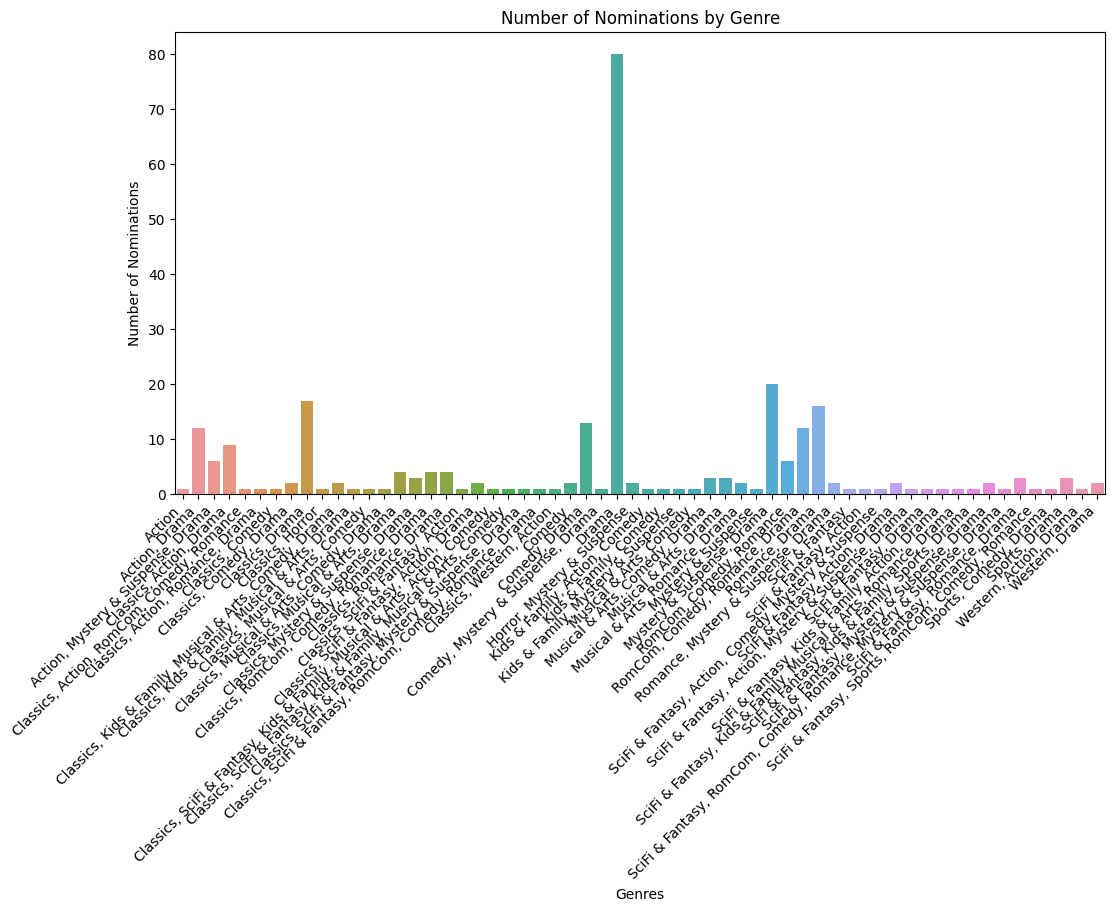

In [ ]:
group_genres_nominations.columns = ['_'.join(col).strip() for col in group_genres_nominations.columns.values]

plt.figure(figsize=(12, 6))
sns.barplot(x=group_genres_nominations.index, y=group_genres_nominations['Nominations_count'])
plt.title('Number of Nominations by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Nominations')
plt.xticks(rotation=45, ha='right')

Categorizing films be genre can be rather subjective. The data we have attributes more than one genre descriptor to movies. From the above picture it can be seen that 'drama' appears many times attatched to other genre descriptors. While the charts above this appeared to show that drama as a genre is correlated with winning more Oscars, this may be attributed to the fact that a majority of the movies in our data set fall within the category of drama.

## Analysis

In [ ]:
# Change Month to numeric for analysis
def object_to_month(string):
    return float(string[5] + string[6])

oscardata['Numeric Month of Release'] = oscardata['Original Release Date'].apply(object_to_month)
oscardata

,Film,Nominations,Film Studio/Producer(s),Award,IMDB Rating,Genres,Original Release Date,Month of Release,Numeric Month of Release
0,Lawrence of Arabia,8,Sam Spiegel,Winner,8.3,"Classics, Action, Drama",1962-12-16,December,12.0
1,The Longest Day,5,Darryl F. Zanuck,Nominee,7.8,"Classics, Action, Drama",1962-06-01,June,6.0
2,Mutiny on the Bounty,7,Metro-Goldwyn-Mayer,Winner,7.7,"Classics, Action, Drama",1935-11-08,November,11.0
3,Mutiny on the Bounty,7,Aaron Rosenberg,Winner,7.2,"Classics, Action, Drama",1962-11-08,November,11.0
4,America America,4,Elia Kazan,Nominee,7.8,Drama,1963-12-15,December,12.0
...,...,...,...,...,...,...,...,...,...
265,Dunkirk,8,Emma Thomas and Christopher Nolan,Nominee,7.8,"Action, Drama",2017-07-21,July,7.0
266,Get Out,3,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"Horror, Mystery & Suspense",2017-02-24,February,2.0
267,Lady Bird,3,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"Comedy, Drama",2017-11-03,November,11.0
268,The Shape of Water,10,Guillermo del Toro and J. Miles Dale,Winner,7.3,"SciFi & Fantasy, Romance, Drama",2017-12-22,December,12.0


Below, we create a new column called Numeric Award that takes the Award Column data. If the film is a winner, it adds a 1 into the Numeric Award column and if the film is a Nominee, it adds a 0 in the Numeric Award column. This new column allows us to have a column of winners and nominees and convers it into a integer so we can use it for our prediction model.

In [ ]:
#Change Award to number (Winner =1 and Nominee = 0)
def object_to_award_num(Award):
  if Award == "Winner":
    return 1
  if Award == "Nominee":
    return 0
  else:
    return None

oscardata['Numeric Award'] = oscardata['Award'].apply(object_to_award_num)
oscardata

,Film,Nominations,Film Studio/Producer(s),Award,IMDB Rating,Genres,Original Release Date,Month of Release,Numeric Month of Release,Numeric Award
0,Lawrence of Arabia,8,Sam Spiegel,Winner,8.3,"Classics, Action, Drama",1962-12-16,December,12.0,1
1,The Longest Day,5,Darryl F. Zanuck,Nominee,7.8,"Classics, Action, Drama",1962-06-01,June,6.0,0
2,Mutiny on the Bounty,7,Metro-Goldwyn-Mayer,Winner,7.7,"Classics, Action, Drama",1935-11-08,November,11.0,1
3,Mutiny on the Bounty,7,Aaron Rosenberg,Winner,7.2,"Classics, Action, Drama",1962-11-08,November,11.0,1
4,America America,4,Elia Kazan,Nominee,7.8,Drama,1963-12-15,December,12.0,0
...,...,...,...,...,...,...,...,...,...,...
265,Dunkirk,8,Emma Thomas and Christopher Nolan,Nominee,7.8,"Action, Drama",2017-07-21,July,7.0,0
266,Get Out,3,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",Nominee,7.7,"Horror, Mystery & Suspense",2017-02-24,February,2.0,0
267,Lady Bird,3,"Scott Rudin, Eli Bush, and Evelyn O'Neill",Nominee,7.4,"Comedy, Drama",2017-11-03,November,11.0,0
268,The Shape of Water,10,Guillermo del Toro and J. Miles Dale,Winner,7.3,"SciFi & Fantasy, Romance, Drama",2017-12-22,December,12.0,1


We used a linear regression model for a simple way to predict if the number of nominations each movie recieved had a correlation with that movie being a winner or not.

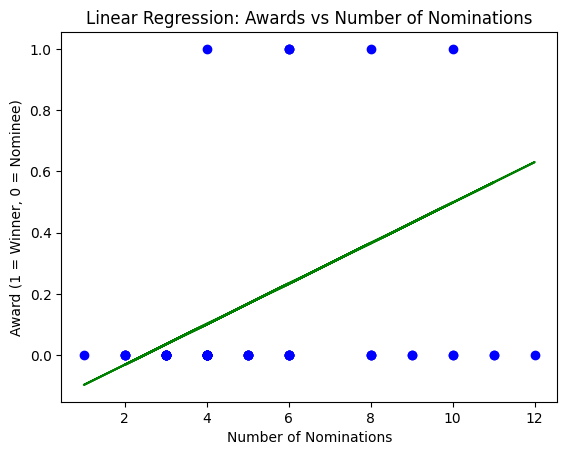

In [ ]:
from sklearn.linear_model import LinearRegression

num_training = int(0.8 * len(oscardata))
num_testing = len(oscardata) - num_training

oscar_X = oscardata['Nominations'].to_numpy().reshape(-1, 1)
oscar_Y = oscardata['Numeric Award'].to_numpy()

oscar_train_X = oscar_X[:num_training]
oscar_test_X = oscar_X[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]

# Create linear regression object
linear_model = LinearRegression()
# Train model
linear_model.fit(oscar_train_X, oscar_train_Y)
# Predict
prediction = linear_model.predict(oscar_test_X)

plt.plot(oscar_test_X, prediction, color = 'green')
plt.scatter(oscar_test_X, oscar_test_Y, color = 'blue')
plt.xlabel('Number of Nominations')
plt.ylabel('Award (1 = Winner, 0 = Nominee)')
plt.title('Linear Regression: Awards vs Number of Nominations')

plt.show()


From the linear regression we see a positive correlation; however, it is fairly weak. It shows us that for an individual movie more nominations predicts a higher chance of winning, but it is not a strong prediction. This was somewhat expected by our group, as the people who vote to determine the Oscar best picture award are the same circle of people who nominate the movies in the first place.

Below we do the same, but now for IMDB ratings.

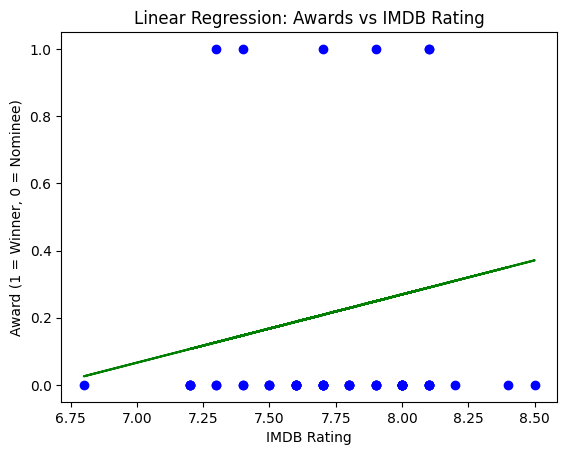

In [ ]:
from sklearn.linear_model import LinearRegression

num_training = int(0.8 * len(oscardata))
num_testing = len(oscardata) - num_training

oscar_X = oscardata['IMDB Rating'].to_numpy().reshape(-1, 1)
oscar_Y = oscardata['Numeric Award'].to_numpy()

oscar_train_X = oscar_X[:num_training]
oscar_test_X = oscar_X[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]

# Create linear regression object
linear_model = LinearRegression()
# Train model
linear_model.fit(oscar_train_X, oscar_train_Y)
# Predict
prediction = linear_model.predict(oscar_test_X)

plt.plot(oscar_test_X, prediction,  color = 'green')
plt.scatter(oscar_test_X, oscar_test_Y,  color = 'blue')
plt.xlabel('IMDB Rating')
plt.ylabel('Award (1 = Winner, 0 = Nominee)')
plt.title('Linear Regression: Awards vs IMDB Rating')

plt.show()

The results of the correlation of IMDB ratings to winning is still positive but not a strong correlation yet again. It is even a bit less positive than the linear regression with number of nominations. This shows us that a higher rating on IMDB slightly predicts a movie to be more likely to win the Oscars.But, since the line for this linear regression is far away from most of the points on the graph it is probably not the best predictor. We were surprised to see that this did not have a higher correlation, as people expect the Oscar winning movies to reflect the opinions of the general audiances. Comparing this with the linear regression graph prior to this one, this might suggest that having been nominated more times within the Oscars is a better predictor that the general publics rating.

We do one last linear regression model to now predict the Month of Release to winners.

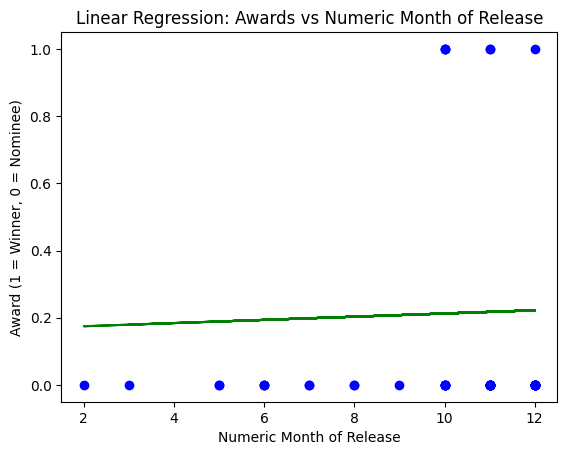

In [ ]:
from sklearn.linear_model import LinearRegression

num_training = int(0.8 * len(oscardata))
num_testing = len(oscardata) - num_training

oscar_X = oscardata['Numeric Month of Release'].to_numpy().reshape(-1, 1)
oscar_Y = oscardata['Numeric Award'].to_numpy()

oscar_train_X = oscar_X[:num_training]
oscar_test_X = oscar_X[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]

# Create linear regression object
linear_model = LinearRegression()
# Train model
linear_model.fit(oscar_train_X, oscar_train_Y)
# Predict
prediction = linear_model.predict(oscar_test_X)

plt.plot(oscar_test_X, prediction,  color = 'green')
plt.scatter(oscar_test_X, oscar_test_Y,  color = 'blue')
plt.xlabel('Numeric Month of Release')
plt.ylabel('Award (1 = Winner, 0 = Nominee)')
plt.title('Linear Regression: Awards vs Numeric Month of Release')

plt.show()

Once again the correlation is positive, but this time it is only a very slight positive; and almost no correlation. The green line in our graph is near the bottom of the y-axis and mostly stays there. This shows that most of the time movies are a nominee and not a winner, and the lines slight positive slope suggests that a later release month makes a movie a bit more likely to be a winner. Our group did not expect the month of release to have a large effect, however; since voting takes place near the start of the year we speculated that movies released in the later part of the previous year might be more in the front of voters minds and win more often. Though, any correlation here can likely be contributed to our findings earlier in our project where we saw that most Oscar movies were released toward the end of the year.

Let's see if we can use the features we've identified to correctly predict whether a movie is a winner or nominee.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay

num_training = int(0.8 * len(oscardata))
num_testing = len(oscardata) - num_training

def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)

    return clf

oscar_X = oscardata[['Nominations', 'IMDB Rating', 'Numeric Month of Release']].to_numpy()
oscar_Y = oscardata['Award'].to_numpy()

oscar_train_X = oscar_X[:num_training]
oscar_test_X = oscar_X[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf = train_SVM(oscar_train_X, oscar_train_Y)

oscar_predicted_train_Y = oscar_clf.predict(oscar_train_X)
oscar_predicted_test_Y = oscar_clf.predict(oscar_test_X)




In [ ]:
print(classification_report(oscar_predicted_train_Y, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       1.00      0.79      0.88       216
      Winner       0.00      0.00      0.00         0

    accuracy                           0.79       216
   macro avg       0.50      0.40      0.44       216
weighted avg       1.00      0.79      0.88       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(oscar_predicted_test_Y, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       1.00      0.89      0.94        54
      Winner       0.00      0.00      0.00         0

    accuracy                           0.89        54
   macro avg       0.50      0.44      0.47        54
weighted avg       1.00      0.89      0.94        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see our model has a significant problem. The model is only predicting movies to be nominees, as we can see from the classification reports above, and we only have an accuracy of 50%. This probably has to do with the fact that our dataset only has a small number of winners compared to nominees.

We can try to balance the dataset more to have a more accurate model.

In [ ]:
oscardata['Award'].value_counts()

Nominee    219
Winner      51
Name: Award, dtype: int64

We can see that there are only 51 winners to 219 nominees. What if we made it so that there are 51 nominees as well?

In [ ]:
balanced_oscardata = oscardata.sort_values('Award', ascending=False).head(102)
balanced_oscardata = balanced_oscardata.sort_values('Original Release Date')
balanced_oscardata['Award'].value_counts()

Winner     51
Nominee    51
Name: Award, dtype: int64

In [ ]:
num_training = int(0.8 * len(balanced_oscardata))
num_testing = len(balanced_oscardata) - num_training

oscar_X = balanced_oscardata[['Nominations', 'IMDB Rating', 'Numeric Month of Release']].to_numpy()
oscar_Y = balanced_oscardata['Award'].to_numpy()

oscar_train_X = oscar_X[:num_training]
oscar_test_X = oscar_X[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf = train_SVM(oscar_train_X, oscar_train_Y)

oscar_predicted_train_Y = oscar_clf.predict(oscar_train_X)
oscar_predicted_test_Y = oscar_clf.predict(oscar_test_X)

In [ ]:
print(classification_report(oscar_predicted_train_Y, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       0.68      0.76      0.71        33
      Winner       0.82      0.75      0.78        48

    accuracy                           0.75        81
   macro avg       0.75      0.75      0.75        81
weighted avg       0.76      0.75      0.75        81



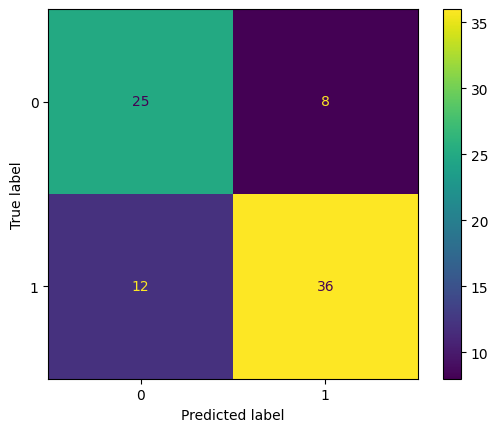

In [ ]:
cm = confusion_matrix(oscar_predicted_train_Y, oscar_train_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

Having balanced the dataset more, we can see that our predictive model is predicting both winners and nominees with an accuracy of 75%. Taking a closer look at the confusion matrix, we can see we have 25 True Positives, 8 False Positives, 12 False Negatives, and 36 True Negatives. That means that our model predicted 25 nominees succesfully and 36 winners successfully. This confusion matrix also suggests that our model is more likely to produce false negatives rather than false positives.

In [ ]:
print(classification_report(oscar_predicted_test_Y, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       0.64      0.82      0.72        11
      Winner       0.71      0.50      0.59        10

    accuracy                           0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21



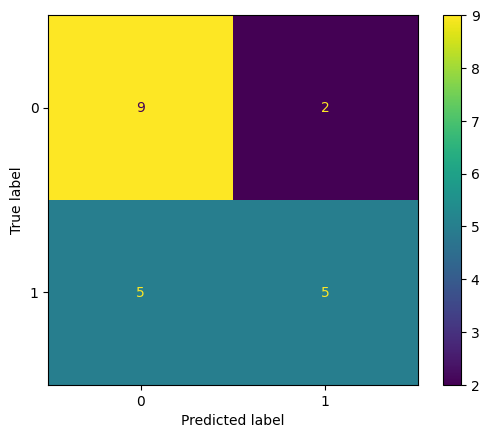

In [ ]:
cm = confusion_matrix(oscar_predicted_test_Y, oscar_test_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

On our test data, we had an accuracy of 68%. In our confusion matrix, we had 9 True Positives, 2 False Positives, 5 False Negatives and 5 True Negatives. That means that our model predicted 9 nominees succesfully and 5 winners succesfully.

However, this model is using all three variables, number of nominations, month of release, as well as IMDB rating. How will the accuracy change if we look at each variable individually?

In [ ]:
oscar_X_Nom = balanced_oscardata[['Nominations']].to_numpy()

oscar_train_X_Nom = oscar_X_Nom[:num_training]
oscar_test_X_Nom = oscar_X_Nom[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf_Nom = train_SVM(oscar_train_X_Nom, oscar_train_Y)

oscar_predicted_train_Y_Nom = oscar_clf_Nom.predict(oscar_train_X_Nom)
oscar_predicted_test_Y_Nom = oscar_clf_Nom.predict(oscar_test_X_Nom)

In [ ]:
print(classification_report(oscar_predicted_train_Y_Nom, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       0.57      0.68      0.62        31
      Winner       0.77      0.68      0.72        50

    accuracy                           0.68        81
   macro avg       0.67      0.68      0.67        81
weighted avg       0.69      0.68      0.68        81



In [ ]:
print(classification_report(oscar_predicted_test_Y_Nom, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       0.71      0.91      0.80        11
      Winner       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



If we set our predictive model to train by only looking at number of nominations, we get a 67% accuracy on our training data and 79% accuracy on our test data.

In [ ]:
oscar_X_IMDB = balanced_oscardata[['IMDB Rating']].to_numpy()

oscar_train_X_IMDB = oscar_X_IMDB[:num_training]
oscar_test_X_IMDB = oscar_X_IMDB[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf_IMDB = train_SVM(oscar_train_X_IMDB, oscar_train_Y)

oscar_predicted_train_Y_IMDB = oscar_clf_IMDB.predict(oscar_train_X_IMDB)
oscar_predicted_test_Y_IMDB = oscar_clf_IMDB.predict(oscar_test_X_IMDB)

In [ ]:
print(classification_report(oscar_predicted_train_Y_IMDB, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       0.68      0.62      0.65        40
      Winner       0.66      0.71      0.68        41

    accuracy                           0.67        81
   macro avg       0.67      0.67      0.67        81
weighted avg       0.67      0.67      0.67        81



In [ ]:
print(classification_report(oscar_predicted_test_Y_IMDB, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       0.50      0.70      0.58        10
      Winner       0.57      0.36      0.44        11

    accuracy                           0.52        21
   macro avg       0.54      0.53      0.51        21
weighted avg       0.54      0.52      0.51        21



If we set our predictive model to train by only looking at IMDB Rating, we get a 67% accuracy on our training data and 54% accuracy on our test data.

In [ ]:
oscar_X_Mon = balanced_oscardata[['Numeric Month of Release']].to_numpy()

oscar_train_X_Mon = oscar_X_Mon[:num_training]
oscar_test_X_Mon = oscar_X_Mon[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf_Mon = train_SVM(oscar_train_X_Mon, oscar_train_Y)

oscar_predicted_train_Y_Mon = oscar_clf_Mon.predict(oscar_train_X_Mon)
oscar_predicted_test_Y_Mon = oscar_clf_Mon.predict(oscar_test_X_Mon)

In [ ]:
print(classification_report(oscar_predicted_train_Y_Mon, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       0.89      0.52      0.65        64
      Winner       0.30      0.76      0.43        17

    accuracy                           0.57        81
   macro avg       0.59      0.64      0.54        81
weighted avg       0.77      0.57      0.61        81



In [ ]:
print(classification_report(oscar_predicted_test_Y_Mon, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       0.79      0.61      0.69        18
      Winner       0.00      0.00      0.00         3

    accuracy                           0.52        21
   macro avg       0.39      0.31      0.34        21
weighted avg       0.67      0.52      0.59        21



If we only look at Month of Release, we get a 59% accuracy on our training data and 39% accuracy on our testing data.

Out of the three variables, the Number of Nominations seems to be the most pivotal to our predictive model's accuracy. While the Month of Release seems to be the most arbitrary, which is in agreement with our linear regression data as well.

Let's take a look at one more combination of variables, the Number of Nominations + the IMDB Rating to see if the two variables together result in a more accurate predictive model.

In [ ]:
oscar_X_Nom_IMDB = balanced_oscardata[['Nominations', 'IMDB Rating']].to_numpy()

oscar_train_X_Nom_IMDB = oscar_X_Nom_IMDB[:num_training]
oscar_test_X_Nom_IMDB = oscar_X_Nom_IMDB[num_training:]
oscar_train_Y = oscar_Y[:num_training]
oscar_test_Y = oscar_Y[num_training:]


oscar_clf_Nom_IMDB = train_SVM(oscar_train_X_Nom_IMDB, oscar_train_Y)

oscar_predicted_train_Y_Nom_IMDB = oscar_clf_Nom_IMDB.predict(oscar_train_X_Nom_IMDB)
oscar_predicted_test_Y_Nom_IMDB = oscar_clf_Nom_IMDB.predict(oscar_test_X_Nom_IMDB)

In [ ]:
print(classification_report(oscar_predicted_train_Y_Nom_IMDB, oscar_train_Y))

              precision    recall  f1-score   support

     Nominee       0.70      0.68      0.69        38
      Winner       0.73      0.74      0.74        43

    accuracy                           0.72        81
   macro avg       0.71      0.71      0.71        81
weighted avg       0.72      0.72      0.72        81



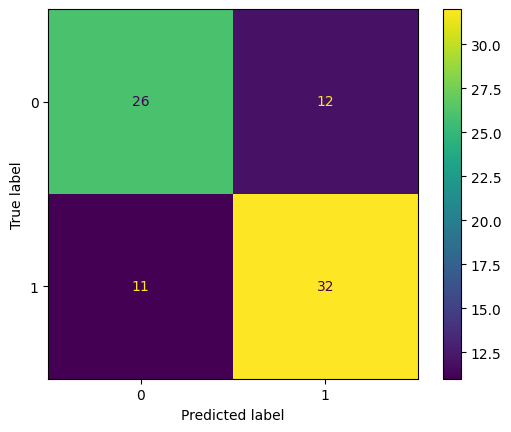

In [ ]:
cm = confusion_matrix(oscar_predicted_train_Y_Nom_IMDB, oscar_train_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [ ]:
print(classification_report(oscar_predicted_test_Y_Nom_IMDB, oscar_test_Y))

              precision    recall  f1-score   support

     Nominee       0.71      0.77      0.74        13
      Winner       0.57      0.50      0.53         8

    accuracy                           0.67        21
   macro avg       0.64      0.63      0.64        21
weighted avg       0.66      0.67      0.66        21



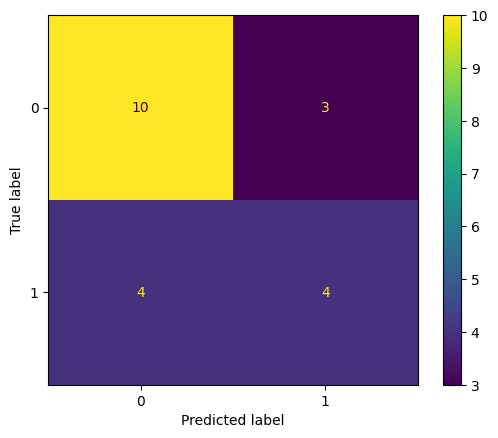

In [ ]:
cm = confusion_matrix(oscar_predicted_test_Y_Nom_IMDB, oscar_test_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

Taking into account both Number of Nominations and IMDB Rating, we get an accuracy of 71% on our training data and 64% on our testing data.  

Although these are both above 50%, we can still say that the most accurate predictor of whether a movie is a winner or nominee is the number of other nominations that movie has received.

Many people expect the Oscars to be a representation of what the general public audeince thinks of films. However, this project suggests that the popularity and public rating of a movie is not as strong of a predictor as the amount of nominations it recieves. Although, we did still see a correlation between high IMDB rating and being an Oscar winner.


# Ethics & Privacy

When considering ethical and privacy concerns within our project we will first look at the data itself. We are using Oscar nominations and winners, which are chosen by the Academy of Motion Picture Arts and Sciences (AMPAS). This group is not an accurate representation of the general population of people who view movies. Since the members of the AMPAS are likely not diverse in terms of gender, race, culture, fame, socioeconomic status, and so forth; their choices in movies is likely not an accurate representation of the population. This makes the data biased, to the perspectives of the members of the AMPAS. On account of this, our data is not generalizable outside of the scope of the Oscars.

Similar to the first concern, movies that are nominated for an Oscar are likely movies coming from well known studios, directors, producers, or some name already well known in the world of film. Movies from independent or new studios are less likely to be included in the Oscars at all. This is more of an issue with a bias in the Oscar nominations themselves, but is worth noting that our project is therefore not generalizable to all movies; only those within the Oscar nominations.

We also would like to consider how our project could affect potential stakeholders. Since we are using studio/producer/director names they could be negatively impacted if our data shows a correlation between those names and not winning the Oscars. We will write any conclusions with these potential impacts in mind. Additionally, our data does not contain any personal information about people except for their names as it appeared in their Oscar nomination. Our project and data also has the potential to be misconstrued if someone believes the factors we are analyzing are causes of the Oscar outcomes. They are not necessarily causations, and we will make this clear throughout our project.

# Conclusion & Discussion

For our project this quater, our group chose to look at the topic of the Oscar Awards, the most revered and anticipated cinematic award ceremony, and how the winners for Best Picture are chose. We wanted to explore this idea because each of us have been curious about the controversy over the Oscars being particularly unfair or biased towards some types of movies over the years. Although we are not trying to see if the Oscars are rigged or not in this study, we do want to see if there is a correlation between particular cinematic features and the movies that are winning Best Picture each year. Through various analyses of data, we strived to answer whether certain features such as number of nominations, IMDB rating, month of release, could be used to predict the winners from the Oscar Best Picture award nominees. Out of these attributes, we hypothesized that the number of categories nominated for would be the most influential in determining an Oscar winner.
We came to the conclusion that yes, certain features could be used to predict Best Picture winners from nominees with the most influential variable being the number of categories a movie is nominated in.

We gathered 2 pre-existing sets of data from datahub and kaggle. The first dataset contains a list of all winners and nominees of every Oscar category in every year since 1927, while the second dataset contains the winners and nominees of only the Best Pictures Award along with features such as date of release, studio, ratings, etc. We use the first dataset to find the total number of nominations for each movie then combined that with the second dataset. We only want to focus on recent data so we also drop any data that is before 1962. To clean these sets even more, we also dropped the irrelevant features and normalized the categorical data into numeric data.

We first evaluated the datasets using basic data visualizations such as boxplots to get a general idea of how the attributes played a role between the winners and the nominees. We proceeded to carry out an exploratory data analysis to analyze the relationship between the features we selected and the movies that won Best Picture out of the nominees. From this we saw that the winners had a higher average number of nominations than the nominees, as well as higher average IMDB ratings. Although the months of release for both groups were similar, with more movies being released in the latter half of the year, our winners dataset had no movies released in June, but this could simply be due to the small size of that dataset. We also noticed that winning movies were generally released in later months of November and December, specifically. Regarding genres, we noticed that the most popular genre was Drama, or other variations that included Drama. This was true for both winners and nominees.

In order to evaluate which of these attributes can be considered the most effective in predicting an Oscar winner out of nominees, we ran linear regression models, training a portion of our data and running it on a test set. We ran the predictive model with an 80-20 split, training 80% of our data and testing it on the remaining 20%. We could not turn our genre data to numerical data, so we decided to just run our analysis on the three other variables. By evaluating our model using the accuracy from classification reports and confusion matrices, we reached the conclusion that the number of nominations for a movie was the attribute that had the highest accuracy in our predictive model and is therefore the most impactful in determining an Oscar winner out of a set of nominees (had a 79% accuracy). Thus, our hypothesis was proved correct. The release month of a movie was the attribute that we evaluated to have the lowest accuracy and therefore was the worst predictor of an Oscar winner out of the features we selected.  

There are some limitations to our project. First of all, our dataset was relatively small and therefore any trends we identified in our analysis could be affected by the small pool size. This was especially apparent when it came to training our predictive model, as our pool of winners was so small compared to the number of nominees. To solve this issue, we restructured our dataset to be more balanced so we are dealing an equal number of nominees and winners. Additionally, the Oscar Best Picture Award winner is chosen among a pool of nominees each year. Therefore, a winner in one year might not necessarily be a winner in any of the other years. Our predictive model does not take this into account, as it is trying to predict winners out of a pool of nominees from different years.

According to our analysis, the number of nominations was the most vital attribute in determining Oscar winners out of nominees and it had the highest accuracy on our predictive model. We believe that this makes sense considering that the members of the Academy of Motion Picture Arts and Sciences (AMPAS) are the ones choosing the winners. Therefore, if they tend to favor a particular movie by awarding it more nominations throughout the entire Oscar Awards ceremony, then they are more likely to favor it for winning Best Picture as well. This reinforces the idea that we presented in the ethics section; the winners of the Oscars is chosen by the board members only, potentially causing it to not be an accurate representation of the true audiences of the movie. The Oscars have been historically criticized for its lack of representation of popular cinematic vote; our project aligns with this idea in that the number of nominations a movie received by the board is better at predicting the winners than IMDB rating, which takes individual votes made by all users. All in all, we have concluded that there are certain attributes, in this case number of nominations in other categories, that are more influential than others when considering which movies are winning the Academy Awards Best Picture award.

# Team Expectations


For the expectations of our group, we mainly expect each other to be present at the weekly meetings and contribute ideas regularly. We also want everyone to be responsive to group messages and reply whenever they are able to. If we assign tasks to complete by ourselves, everyone should complete them before the deadline; if one of us cannot complete the task assigned to us, we should let the rest of the team know we can’t complete it. Overall, we expect everyone to have good communication and to stay involved in all aspects of the project.
Signed by:
- Lucy Granger
- Jenny Quach
- Anvita Suresh
- Boston Thome
- Angela Wu


# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/6  |  3:30 PM | Take a look at datasets and come up with ideas for how to organize data. Do background research on the topic.  | Assign specific data wrangling tasks to everyone. |
| 11/13  |  3:30 AM |  Import and wrangle data | Final touches before turning Checkpoint #1 in. |
| 11/20  | 3:30 AM  | Start thinking about how we can analyze data  | Final touches before turning Checkpoint #2 in.   |
| 11/27  | 3:30 PM  | 	Complete analysis task. | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 12/4  | 3:30 PM  | 	Do research on other analyses we could do on the project. | Pick an analytical approach/tool. Assign analysis and data visualization tasks. |
| 12/11  | 3:30 PM  | Complete analysis and data visualization tasks; Draft results/conclusion/discussion | Discuss/edit full project and record video |
| 12/13  | Before 11:59 PM  | Final Touches on individual tasks | Turn in Final Project with the Video & Group Project Surveys |